In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
# 環境
class Environment(object):
  # インスタンス化
  def __init__(self):
    pass
  
  # 選択された行動を受け取って環境を更新
  def step(self, action):
    pass
  
  # 現在の状態を元に報酬を返す
  def _get_reward(self):
    pass

In [0]:
'''
------------------------------
|  |  |  |  |  |  |  |  |  |  |
------------------------------
|  |  |  |  |  |  |  |  |  |  |
------------------------------
|  |  |  |  |  |  |  |  |  |  |
------------------------------
|S |  |  |  |  |  |  |G |  |  |
------------------------------
|  |  |  |  |  |  |  |  |  |  |
------------------------------
|  |  |  |  |  |  |  |  |  |  |
------------------------------
|  |  |  |  |  |  |  |  |  |  |
------------------------------
'''

# グリッドワールド環境
class GridWorld(Environment):
  FIELD_TYPES = [
    '-',  # 0: 何もない場所
    'S',  # 1: スタート
    'G'   # 2: ゴール
  ]
  MAP = np.array([
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # ----------
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # ----------
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # ----------
    [1, 0, 0, 0, 0, 0, 0, 2, 0, 0],  # S------G--
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # ----------
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # ----------
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]   # ----------
  ])
  MAP_RANGE = list(MAP.shape)  # 形は[y, x]([7, 10])
  ACTION = [  #[y, x]
    [-1, 0],  # ↑
    [-1, 1],  # 右上
    [0, 1],   # →
    [1, 1],   # 右下
    [1, 0],   # ↓
    [1, -1],  # 左下
    [0, -1],  # ←
    [-1, -1]  # 左上
  ]
  # ACTION = [  #[y, x]
  #   [-1, 0],  # ↑
  #   [0, 1],   # →
  #   [1, 0],   # ↓
  #   [0, -1]  # ←
  # ]

  # インスタンス化
  def __init__(self):
    super().__init__()
    self.pos = self._find_pos('S')[0]  # スタートの座標 [3, 0]
    self.goal = self._find_pos('G')[0]  # ゴールの座標 [3, 7]

  # パラメータの初期化
  def initialize(self):
    self.pos = self._find_pos('S')[0]  # スタートの座標 [3, 0]
    self.goal = self._find_pos('G')[0]  # ゴールの座標 [3, 7]

  # 選択された行動を受け取って環境を更新&報酬を返す
  def step(self, action):
    next_pos = self.pos + self.ACTION[action]
    # マップの範囲内であれば座標を新たな座標に更新
    if self._is_movable(next_pos):
      self.pos = next_pos
    reward = self._get_reward()

    return reward, self._pos_to_state(self.pos)

  # 現在の状態を元に報酬を返す
  def _get_reward(self):
    super()._get_reward()
    if self._is_at_goal():
      return 1
    else:
      return -1
  
  # 終端状態かどうか判定
  def is_end(self):
    return self._is_at_goal()

  # 現状態を返す
  def get_cur_state(self):
    return self._pos_to_state(self.pos)
  
  # 現在の位置がゴールの位置かどうか
  def _is_at_goal(self):
    return (self.pos == self.goal).all()
  
  # 渡した座標が移動できる場所であるかどうか判定
  def _is_movable(self, pos):
    return (
        0 <= pos[0] < self.MAP_RANGE[0]  # y軸
        and 0 <= pos[1] < self.MAP_RANGE[1]  # x軸
    )
  
  # 座標から状態に変換
  def _pos_to_state(self, pos):
    return pos[0] * self.MAP_RANGE[1] + pos[1]
  
  # 特定のタイプのマスの座標を返す
  def _find_pos(self, field_type):
    pos = np.array(list(zip(*np.where(self.MAP == self.FIELD_TYPES.index(field_type)))))
    return pos

In [0]:
'''
------------------------------
|  |  |  |  |  |  |  |  |  |  |
------------------------------
|  |  |  |  |  |  |  |  |  |  |
------------------------------
|  |  |  |  |  |  |  |  |  |  |
------------------------------
|S |  |  |  |  |  |  |G |  |  |
------------------------------
|  |  |  |  |  |  |  |  |  |  |
------------------------------
|  |  |  |  |  |  |  |  |  |  |
------------------------------
|  |  |  |  |  |  |  |  |  |  |
------------------------------
 0  0  0  1  1  1  2  2  1  0
'''

# 風ありグリッドワールド環境
class WindyGridWorld(GridWorld):
  WIND_STR = [0, 0, 0, 1, 1, 1, 2, 2, 1, 0]  # 上向き風の強さ
  WIND_PROB = [1/3, 1/3, 1/3]

  # インスタンス化
  def __init__(self):
    super().__init__()

  # 選択された行動を受け取って環境を更新&報酬を返す
  def step(self, action):
    wind_delta = [self.WIND_STR[self.pos[1]] + np.random.choice([-1, 0, 1], p=self.WIND_PROB), 0]  # 風の影響
    next_pos = self.pos + self.ACTION[action] - wind_delta
    # マップの範囲内であれば座標を新たな座標に更新
    if self._is_movable(next_pos):
      self.pos = next_pos
    reward = self._get_reward()

    return reward, self._pos_to_state(self.pos)

In [0]:
'''
------------------------------
|  |  |  |  |  |  |  |  |  |  |
------------------------------
|  |  |  |  |  |  |  |  |  |  |
------------------------------
|  |  |  |  |  |  |  |  |  |  |
------------------------------
|S |C |C |C |C |C |C |C |C |G |
------------------------------
'''

# 崖ありグリッドワールド環境
class CliffGridWorld(GridWorld):
  FIELD_TYPES = [
    '-',  # 0: 何もない場所
    'S',  # 1: スタート
    'G',  # 2: ゴール(報酬 +1)
    'C'   # 3: 崖(報酬 -100)
  ]
  MAP = np.array([
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # ----------
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # ----------
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # ----------
    [1, 3, 3, 3, 3, 3, 3, 3, 3, 2]   # SCCCCCCCCG
  ])
  MAP_RANGE = list(MAP.shape)  # 形は[y, x]([4, 10])

  # インスタンス化
  def __init__(self):
    super().__init__()
    self.cliff = self._find_pos('C')  # 崖の座標 [3, 1:9]
  
  # 現在の状態を元に報酬を返す
  def _get_reward(self):
    super()._get_reward()
    if self._is_at_goal():
      return 1
    elif self._is_at_cliff():
      return -100
    else:
      return -1
  
  # 終端状態かどうか判定
  def is_end(self):
    return self._is_at_goal() or self._is_at_cliff()
  
  # 崖にいるかどうか判定
  def _is_at_cliff(self):
    return (self.pos == self.cliff).all(axis=1).any()

In [0]:
# エージェント
class Agent(object):
  def __init__(self, n_state, n_action):
    self.n_state = n_state
    self.n_action = n_action
    self.q_table = np.zeros((self.n_state, self.n_action))
    self.step = 0
  
  # インスタンス化
  def initialize(self):
    self.q_table = np.zeros((self.n_state, self.n_action))
    self.step = 0
  
  # 行動の選択
  def action(self):
    pass
  
  # パラメータの更新
  def update(self):
    self.step += 1

In [0]:
# greedy方策
def greedy(value_list):
  max_values = np.where(value_list == np.amax(value_list))
  return np.random.choice(max_values[0])

# eps-greedy方策
def eps_greedy(value_list, eps):
  if np.random.rand() < eps:  # greedy
    return np.random.randint(0, len(value_list))
  else:  # 一様ランダム
    return greedy(value_list)

In [0]:
# Sarsa(方策オン型TD制御アルゴリズム)
class Sarsa(Agent):
  def __init__(self, n_state, n_action, alpha, gamma, policy, eps):
    super().__init__(n_state, n_action)
    self.alpha = alpha  # 学習率
    self.gamma = gamma  # 割引率
    self.policy = policy  # 行動を決める方策
    self.eps = eps
    self._eps = eps
    self.delta_eps = 0.0  # epsilon減衰時の減衰値
    self.cur_action = None

    self.name = 'Sarsa(α={})'.format(self.alpha)
    
  # 行動の選択
  def action(self, state):
    # 最初は方策に従って行動を選択
    if self.step == 0:
      return self._select_action(state)
    # 2回目以降は推定方策に従って行動を選択
    else:
      return self.cur_action
  
  # 方策に従った行動の選択
  def _select_action(self, state):
    # greedy方策
    if self.policy == 'greedy':
      return greedy(self.q_table[state])
    # epsilon-greedy方策
    elif self.policy == 'eps-greedy':
      return eps_greedy(self.q_table[state], self.eps)
  
  # パラメータの更新
  def update(self, cur_state, action, reward, next_state):
    super().update()
    # 実際の方策に従って次状態における行動を選択
    next_action = self._select_action(next_state)
    td_error = reward + self.gamma * self.q_table[next_state, next_action] - self.q_table[cur_state, action]
    self.q_table[cur_state, action] += self.alpha * td_error
    self.cur_action = next_action

In [0]:
# Q学習(方策オフ型TD制御アルゴリズム)
class QLearn(Agent):
  def __init__(self, n_state, n_action, alpha, gamma, policy, eps):
    super().__init__(n_state, n_action)
    self.alpha = alpha  # 学習率
    self.gamma = gamma  # 割引率
    self.policy = policy  # 行動を決める方策
    self.eps = eps
    self._eps = eps
    self.delta_eps = 0.0  # epsilon減衰時の減衰値

    self.name = 'QLearn(α={})'.format(self.alpha)
    
  # 行動の選択
  def action(self, state):
    # greedy方策
    if self.policy == 'greedy':
      return greedy(self.q_table[state])
    # epsilon-greedy方策
    elif self.policy == 'eps-greedy':
      return eps_greedy(self.q_table[state], self.eps)
  
  # パラメータの更新
  def update(self, cur_state, action, reward, next_state):
    super().update()
    td_error = reward + self.gamma * np.amax(self.q_table[next_state]) - self.q_table[cur_state, action]
    self.q_table[cur_state, action] += self.alpha * td_error

In [0]:
# シミュレーションの実行
def run(env, agt_list, n_sims=10, n_epis=175, max_steps=1000):
  n_agt = len(agt_list)  # 全エージェント数
  n_state = env.MAP.size  # 全状態数
  n_action = len(env.ACTION)  # 全行動数

  name_list = []
  # cur_epi_data = np.zeros((n_agt, max_steps))  # 現在のstepはエピソード数
  step_taken_data = np.zeros((n_agt, n_epis))  # ゴールするまでにかかったstep数
  rewards = np.zeros((n_agt, n_epis))  # エピソードごとに得られた報酬

  for agt_idx, agt in enumerate(agt_list):
    print(agt.name)
    name_list.append(agt.name)

    for sim in range(n_sims):
      print('sim :', sim+1)
      agt.initialize()
      n_goal = 0

      for epi in range(n_epis):
        ev.initialize()  # 環境の初期化
        cur_state = env.get_cur_state()  # スタート地点へ戻す
        sum_reward = 0

        for step in range(max_steps):
          action = agt.action(cur_state)  # 行動の選択
          reward, next_state = env.step(action)  # 選択した行動の実行
          agt.update(cur_state, action, reward, next_state)  # エージェントのパラメータの更新

          cur_state = next_state  # 状態の更新
          # cur_epi_data[agt_idx, step] += epi
          sum_reward += reward

          # 終端状態(ゴールへ到達・崖へ落ちた)
          if env.is_end():
            step_taken_data[agt_idx, epi] += step
            break
        rewards[agt_idx, epi] = sum_reward  # 今回のエピソードの最終ステップで得られた報酬を保存
  
  # cur_epi_data /= n_sims
  step_taken_data /= n_sims
  rewards /= n_sims
  print('step')
  print(step_taken_data)
  print('reward')
  print(rewards)

  # 結果をプロット
  # self.plot(cur_epi_data, 'Reault', 'Steps', 'Episodes')
  plot(step_taken_data, title='Result', xlabel='Episodes', ylabel='Steps', name_list=name_list)
  plot(rewards, title='Result', xlabel='Episodes', ylabel='Rewards', name_list=name_list)

In [0]:
# データをグラフにプロット
def plot(data_list, title, xlabel, ylabel, name_list):
  fig = plt.figure(figsize=(12, 8))
  ax = fig.add_subplot(111)

  for i, data in enumerate(data_list):
    ax.plot(data, label=name_list[i], linewidth=1.5, alpha=0.8)

  # ax.title(title)
  ax.set_xlabel(xlabel)
  ax.set_ylabel(ylabel)
  ax.legend(loc='upper right', fontsize=14)
  ax.grid(axis='y')

  plt.show()

Sarsa(α=0.1)
sim : 1
sim : 2
sim : 3
QLearn(α=0.1)
sim : 1
sim : 2
sim : 3
step
[[1292.33333333  864.66666667  389.66666667 ...   42.
    27.           13.66666667]
 [1705.33333333  712.33333333  404.33333333 ...   19.
    10.33333333   45.66666667]]
reward
[[ -272.33333333 -1000.           -11.33333333 ...    -3.66666667
     -6.            -3.        ]
 [ -802.          -609.          -127.33333333 ...    -9.66666667
     -1.66666667    -1.66666667]]


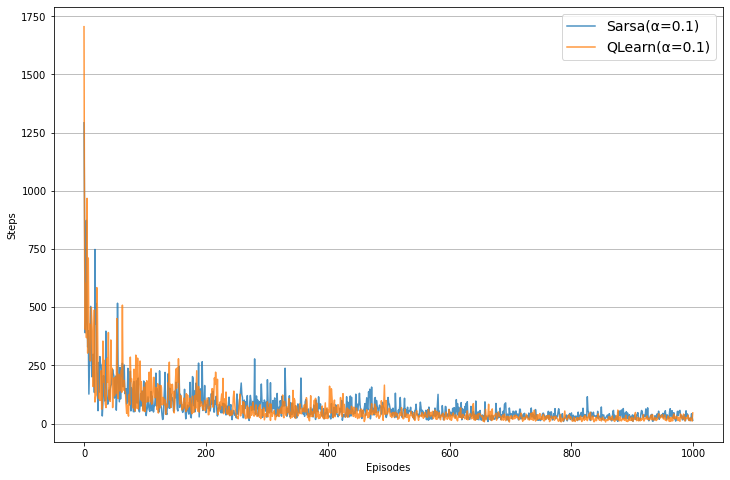

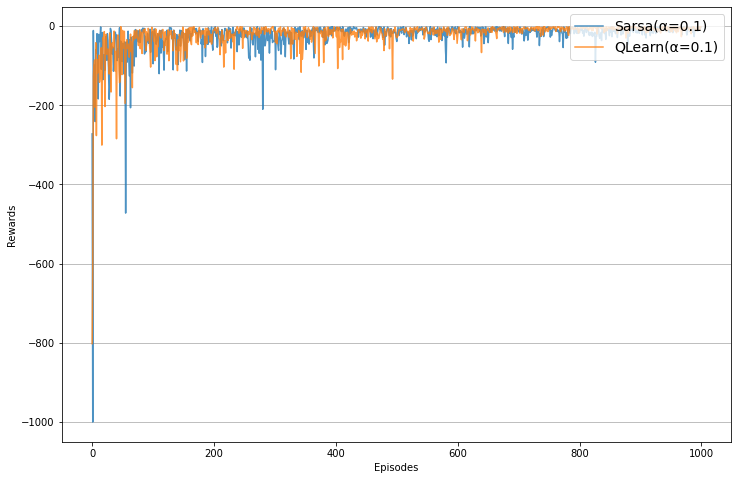

In [0]:
N_SIMS = 10  # シミュレーション回数
N_EPIS = 1000  # エピソード回数
MAX_STEPS = 3000  # 最大step回数

# ev = GridWorld()
ev = WindyGridWorld()  # 環境オブジェクト
# ev = CliffGridWorld()
n_state = ev.MAP.size  # 全状態数
n_action = len(ev.ACTION)  # 全行動数

# エージェントリスト
ag_list = [
  Sarsa(n_state, n_action, alpha=0.1, gamma=1.0, policy='eps-greedy', eps=0.1),
  QLearn(n_state, n_action, alpha=0.1, gamma=1.0, policy='eps-greedy', eps=0.1)
]

# シミュレーションの実行
run(env=ev, agt_list=ag_list, n_sims=N_SIMS, n_epis=N_EPIS, max_steps=MAX_STEPS)